In [32]:
from collections import namedtuple

# alias a named tuple 
vector = namedtuple('vector', ['x', 'y', 'z'])#(0,0,0)

In [36]:
import numpy as np
vector = np.array((0,0,0))

In [54]:
import numpy as np

class unitArray(np.ndarray):

    def __new__(subtype, shape=(3), dtype=float, buffer=None, offset=0,
          strides=None, order=None, units=None):
        # Create the ndarray instance of our type, given the usual
        # ndarray input arguments.  This will call the standard
        # ndarray constructor, but return an object of our type.
        # It also triggers a call to InfoArray.__array_finalize__
        obj = np.ndarray.__new__(subtype, shape, dtype, buffer, offset, strides,
                         order)
        # set the new 'info' attribute to the value passed
        obj.units = units
        obj.istimevec = True if 's' in units else False
        # Finally, we must return the newly created object:
        return obj

    def __array_finalize__(self, obj):
        # ``self`` is a new object resulting from
        # ndarray.__new__(InfoArray, ...), therefore it only has
        # attributes that the ndarray.__new__ constructor gave it -
        # i.e. those of a standard ndarray.
        #
        # We could have got to the ndarray.__new__ call in 3 ways:
        # From an explicit constructor - e.g. InfoArray():
        #    obj is None
        #    (we're in the middle of the InfoArray.__new__
        #    constructor, and self.info will be set when we return to
        #    InfoArray.__new__)
        if obj is None: return
        # From view casting - e.g arr.view(InfoArray):
        #    obj is arr
        #    (type(obj) can be InfoArray)
        # From new-from-template - e.g infoarr[:3]
        #    type(obj) is InfoArray
        #
        # Note that it is here, rather than in the __new__ method,
        # that we set the default value for 'info', because this
        # method sees all creation of default objects - with the
        # InfoArray.__new__ constructor, but also with
        # arr.view(InfoArray).
        self.units = getattr(obj, 'units', None)
        self.istimevec = False
        # We do not need to return anything

In [55]:
a = unitArray((1,1,1), units = 'm/s')

In [56]:
a.istimevec

True

In [44]:
class player:
    """The player object
    >>> player([0,0,0])
    """
    
    def __init__(self, loc = [0,0,0], v = [0,0,0], mass = 1):
        import numpy as np
        self.loc = np.array(loc)
        self.mass = mass
        self.v = np.array(v)
        self.p = self.v * self.mass
        self.impulse = (0,0,0)

    def _update_(self):
        
        # add the impulse to momentum
        # convert momentum to a velocity
        # update the position vector
        
        self.p = self.p + self.impulse
        self.v = self.p / self.mass
        self.loc += self.v
        
    def push(self, F = (0,0,0)):
        self.impulse = np.array(F / dt)
        

### Convert Cartesian to Polar Coordinate system 

$x = r \sin{\theta}$  
$y = r \sin{\theta}$  
$z = r \sin{\theta}$

# Premise

The idea of this game is to stradle between universes with different dimensionalities. The Player object by default inhabits a 4 dimensional world which has 3 spatial dimensions ($x, y, z$) and one time dimension ($t$). Into this world an otherworldy object randomly spawns, which warps the space time around it, causing the spatial deminsion which radiates from it's axis to collapse into the temporal dimension. The effect being that travel is restricted to movement towards the object. When the player approaches the object movement is best defined by polar coordinates.

Force can only be applied such that the radial component is always decreasing.

$\hat{F} = [f_x, f_y, f_z]$  
$f_x =   $

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
x = 0

<slot wrapper '__iter__' of 'list' objects>

### spherical coordinates

$x = r \sin{\theta} \cos{\phi}$  
$y = r \sin{\theta} \sin{\phi}$  
$z = r \cos{\theta}$

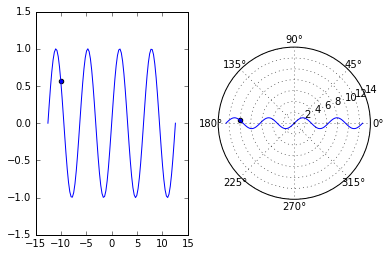

In [211]:
#fig = plt.figure()

#ax1 = fig.add_subplot(121)
#ax2 = fig.add_subplot(122, polar = True)


#X = np.linspace(-4*np.pi,4*np.pi, 100)
#Y = np.sin(X)

def cart2polar(X, Y):
    """
    converts an X, Y pair to 
    """

    r =  np.sqrt((X**2) + (Y**2))
    theta = np.arctan(Y/X)
    theta[(X < 0)] = np.pi+ theta[(X < 0)]

    return r, theta

#theta[(X > 0) & (Y < 0)] += 2*np.pi

#ax1.plot(X,Y)
#ax2.plot(theta, r)

#
#ax1.scatter(X[10], Y[10])
#ax2.scatter(theta[10], r[10])

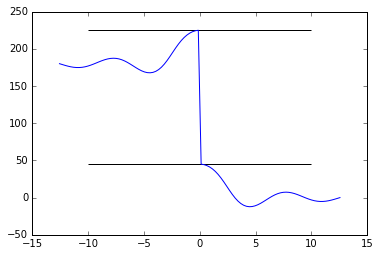

In [208]:
#plt.plot( X, r)
plt.plot( X, np.degrees(theta))
plt.hlines(45,-10,10)
plt.hlines(225,-10,10)
#plt.plot( X, Y)



In [139]:
r

array([ -2.23348794e-15,  -2.03949703e-02,  -4.02975454e-02,
        -5.83911768e-02,  -7.34312594e-02,  -8.43263132e-02,
        -9.02056394e-02,  -9.04720135e-02,  -8.48415213e-02,
        -7.33732711e-02,  -5.64891262e-02,  -3.49791389e-02,
        -9.98457004e-03,   1.70498793e-02,   4.44579931e-02,
         7.04623048e-02,   9.32977073e-02,   1.11329508e-01,
         1.23151103e-01,   1.27656569e-01,   1.24094236e-01,
         1.12113290e-01,   9.18136811e-02,   6.38000345e-02,
         2.92260566e-02,  -1.01968792e-02,  -5.22556273e-02,
        -9.43690875e-02,  -1.33783032e-01,  -1.67779429e-01,
        -1.93845137e-01,  -2.09764926e-01,  -2.13640949e-01,
        -2.03875844e-01,  -1.79177752e-01,  -1.38650765e-01,
        -8.20206454e-02,  -9.99798861e-03,   7.53200154e-02,
         1.70240199e-01,   2.69731822e-01,   3.68232345e-01,
         4.60703386e-01,   5.43433886e-01,   6.14285246e-01,
         6.72449165e-01,   7.17989011e-01,   7.51395171e-01,
         7.73256407e-01,

In [122]:
np.sin(1)**-1

1.1883951057781212

In [ ]:
ax = ax[1] 

In [68]:
ax.properties()

{'adjustable': 'box',
 'agg_filter': None,
 'alpha': None,
 'anchor': 'C',
 'animated': False,
 'aspect': 'auto',
 'autoscale_on': True,
 'autoscalex_on': True,
 'autoscaley_on': True,
 'axes': <matplotlib.axes._subplots.AxesSubplot at 0x1d3775d5c0>,
 'axes_locator': None,
 'axis_bgcolor': 'w',
 'axisbelow': False,
 'children': [<matplotlib.spines.Spine at 0x1d3775dfd0>,
 'clip_box': None,
 'clip_on': True,
 'clip_path': None,
 'contains': None,
 'cursor_props': (1, (0.0, 0.0, 0.0, 1.0)),
 'data_ratio': 1.0,
 'default_bbox_extra_artists': [<matplotlib.spines.Spine at 0x1d3775dfd0>,
 'figure': <matplotlib.figure.Figure at 0x1d36b4c2b0>,
 'frame_on': True,
 'geometry': (2, 1, 2),
 'gid': None,
 'images': <a list of 0 AxesImage objects>,
 'label': '',
 'legend': None,
 'legend_handles_labels': ([], []),
 'lines': <a list of 0 Line2D objects>,
 'navigate': True,
 'navigate_mode': None,
 'path_effects': [],
 'picker': None,
 'position': Bbox([[0.125, 0.1250000000000001], [0.9, 0.47727272727

In [60]:
plt.plot?

x = r sin(theta)

r = x / sin(theta)
theta = sin^-1(r/x)

In [ ]:
    var v_max = 2 # max velocity
    
    var impulse = new xy([0,0])
    
    console.log("velocty is " + Ball.v)
    console.log("momentum is " + Ball.p.x + Ball.p.y)
    
    
    # The momentum principle:
    # -----------------------
    # 
    # An object has momentum. Momentum is determined
    # as the mass of the object multiplied by the object's 
    # velocity.
    # 
    # py = vy * mass
    # px = px * mass
    # 
    # Force acts on momentum. The impulse is the force over dt.
    # 
    # p = p + F/dt
    #
    
    var xmlns = "http:#www.w3.org/2000/svg"
    
    # Quest: Find a way to land the traveller in the world
    var traveller = document.createElementNS(xmlns, "circle")      
    
    traveller.setAttributeNS(null,"x",50)
    traveller.setAttributeNS(null,"y",50)
    traveller.setAttributeNS(null,"r",50)
    traveller.setAttributeNS(null,"fill", "black")
    document.documentElement.appendChild(traveller)
    
    # self def is called on page load.

    def drawGameSVG() 

        # Play the game until the player stops.
        gameLoop = setInterval(drawBall, 1)

        # Add keyboard listener.
        window.addEventListener('keydown', whatKey, true)
        
    

    def drawBall() 
        Ball.updatepos(impulse)
        impulse.x = 0
        impulse.y = 0
        
        # Change the player location.
        player.setAttribute("cx", Ball.loc.x)
        player.setAttribute("cy", Ball.loc.y)
    
    # Get key press.
    def whatKey(evt) 

        switch (evt.keyCode) 
            # Left arrow.
            case 37:
            impulse.x = -1
            break
            # Right arrow.
            case 39:
            impulse.x = 1
            break
            #Up arrow
            case 38:
            impulse.y = -1
            break
            #Down arrow
            case 40:
            impulse.y = 1
            break